# EDA- PRÁCTICA FINAL

La pregunta de negocio que buscamos responder es:

__¿Qué factores están relacionados con que los pasajeros tengan una mayor/menor probabilidad de sobrevivir?__

### 1) Importamos las librerías que vamos a utilizar:

In [349]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [350]:
# al hacer los gráficos en Seaborn me aparecen unas advertencias a causa de la versión, así que pongo un filtro para suprimirlas
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### 2) y 3) Tener una idea general de nuestro dataset y definir los tipos de datos que tenemos:

Cargamos los datos:

In [351]:
db = pd.read_csv("titanic.csv")

Analizamos los datos que tenemos a nivel general:

In [352]:
db.shape

(891, 12)

nuestro dataset tiene 891 filas y 12 columnas

Visualizamos los datos de nuestro dataset, sólo las 10 primeras columnas para conocer con qué valores vamos a trabajar:

In [353]:
db.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


con estos datos mostrados podemos apreciar que tenemos variables numéricas y categóricas, entre las cuales están:
* Passengerid, es el número de identificación del pasajero
* Survived, si sobrevivió =1 o no sobrevivió =0
* Pclass, la clase en la que viajaba el pasajero
* Name, el nombre del pasajero
* Sex, género del pasajero
* Age, edad en años del pasajero
* Sibsp, con cuántos hermanos o cónyuge a bordo viabaja el pasajero
* Parch, con cuántos padres o hijos a bordo viajaba el pasajero
* Ticket, el número de billete
* Fare, la tarifa del billete
* Cabin, el número de cabina en la que viajaba el pasajero
* Embarked, puerto de embarque (S= Southhampton, C= Cherbourg y Q= Queenstone)


Ahora veremos la información que nos brinda nuestro dataset, de qué tipo es y qué cantidad de no nulos tiene:

In [354]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


aquí podemos visualizar que tanto las variables: "Age", "Cabin" y "Embarked" tienen valores nulos.

Ahora vamos a nombrar todas las columnas que tenemos:

In [355]:
db.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 4) Preparación de datos

Realizamos un pre-procesamiento y limpieza básicos de los datos para poder continuar con nuestro análisis:

* Fijamos el índice para poder ordenar mejor los datos de la tabla

In [356]:
db.set_index("PassengerId", inplace= True)

In [357]:
db.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


Para facilidad en el manejo de las variables, convertiremos las mayúsculas a minúsculas con un bucle

In [358]:
db.columns = [col.lower() for col in db]

In [359]:
db.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

* __Manejo de valores nulos:__

In [360]:
db.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

Al analizar nuestro dataset se puede apreciar que la variable ___"age" presenta 177 valores nulos___ , la variable ___"cabin" presenta 687 valores nulos___ y la variable ___"embarked" presenta 2 valores nulos___; en base a la relevancia que podrían tener estas columnas en la probabilidad de supervivencia, decimos aplicar la imputación de datos para la variable age y la eliminación para la variable cabin, ya que tiene demasiado valores nulos y los datos que nos aporta no tienen una mayor importancia, en cuanto a la variable embarked al tener sólo 2 valores nulos, entonces también los imputaremos por el valor que más se repita.

* __Imputación de valores nulos en "age":__

a fin de poder decidir si podríamos usar la media o la mediana para imputar los datos faltantes, lo más adecuado sería aplicar las medidas de tendencia central y de variabilidad para visualizar los datos que tenemos en la columna "age".

In [361]:
db.age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

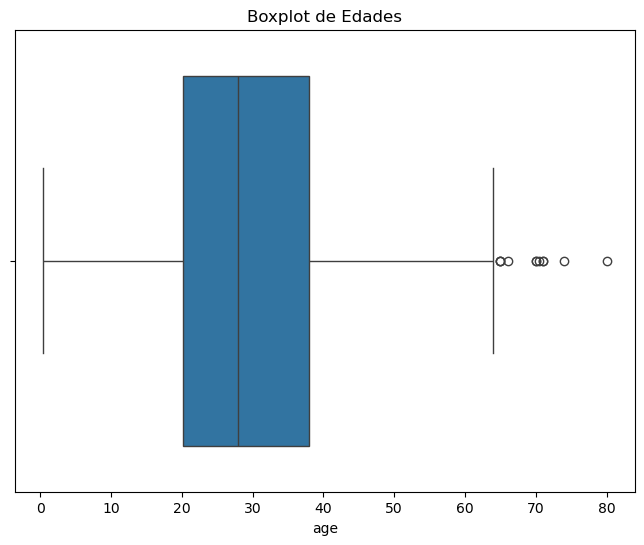

In [362]:
# para visualizar cómo podríamos manejar los outliers podemos hacer un gráfico de caja
plt.figure(figsize=(8,6))
sns.boxplot(x= db["age"])
plt.title("Boxplot de Edades")
plt.xlabel("age")
plt.show()

según los resultados obtenidos podemos apreciar que la edad mínima es de 0.42 años y la edad máxima es de 80 años, los cuales son valores muy extremos, que se encuentran en el límite mínimo de uno de los whiskers y en la parte externa (o también conocido como _outlier_ ) respectivamente. Al comparar estos datos con el percentil 25 que es 20.12 años y con el percentil 75 que es de 38 años. Por lo tanto, para evitar mayores sesgos, en este caso vamos a escoger el valor de la mediana que es de 28 años y es el valor central para todo el conjunto de datos.

In [363]:
mediana_age = db["age"].median()

In [364]:
db["age"].fillna(mediana_age, inplace=True)
print (db["age"])

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889    28.0
890    26.0
891    32.0
Name: age, Length: 891, dtype: float64


In [365]:
db.age.isnull().sum()

0

* __Imputación de valores en "embarked":__

ya que sólo son dos valores los que debemos sustituir, buscaremos el valor que más se repita en la columna "embarked" y los dos faltantes los vamos a sustituir por ese valor.

In [366]:
moda_embarked = db.embarked.mode()[0]
moda_embarked

'S'

In [367]:
db.embarked.fillna(moda_embarked, inplace=True)
db.embarked.isnull().sum()

0

* __Eliminación de variables:__

la columna "cabin" tiene muchos datos nulos y al no ser datos relevantes para el porcentaje de supervivencia entonces vamos a eliminar la columna por completo. 

In [368]:
db.cabin.isnull().sum()

687

In [369]:
db.drop(labels="cabin", axis=1, inplace=True)

Lo mismo haremos con la columna "ticket", ya que no consideramos que los números del billete de viaje sean importantes para determinar la supervivencia en el naufragio.

In [370]:
db.drop(labels="ticket", axis=1, inplace=True)

In [371]:
db.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [372]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       891 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   fare      891 non-null    float64
 8   embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


In [373]:
db.head(10)

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,8.4583,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S


Vemos que nuestro dataset se ha reducido y nos permite visualizar con más detalle los datos que nos presenta. Podemos apreciar que la columna "name" nos muestra el nombre completo de los pasajeros junto con el título que poseen. Sería interesante poder analizar si el título también fue relevante a la hora de decidir quiénes subirían a los botes salvavidas y, por consiguiente, tendrían mayores probabilidades de sobrevivir.

* __Separación de datos y creación de nuevas columnas__

Tal como se puede apreciar en la columna "name", el título está situado después de una coma y justo antes de un punto, a veces está situado en segundo lugar, pero no siempre, así que para poder separarlo usaremos la librería de expresiones regulares junto con una función lambda para separar los nombres de los títulos y crear una nueva columna _"title"_ que nos permita analizar los datos por separado: 

In [374]:
import re

In [375]:
db["title"] = db["name"].apply(lambda x: re.search(r',\s*(.*?)\s*\.', x).group(1))

asimismo creamos una nueva columna _"full_name"_ que junte el nombre completo y demás datos adjuntos de los pasajeros:

In [376]:
db["full_name"] = db["name"].apply(lambda x: re.sub(r',\s*(.*?)\s*\.', '', x).strip())

In [377]:
db.head(10)

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,title,full_name
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,Braund Owen Harris
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,Cumings John Bradley (Florence Briggs Thayer)
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,Heikkinen Laina
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,Futrelle Jacques Heath (Lily May Peel)
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,Allen William Henry
6,0,3,"Moran, Mr. James",male,28.0,0,0,8.4583,Q,Mr,Moran James
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,Mr,McCarthy Timothy J
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,Master,Palsson Gosta Leonard
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,Mrs,Johnson Oscar W (Elisabeth Vilhelmina Berg)


por último eliminamos la columna "name" para evitar duplicidades:

In [378]:
db.drop (labels="name", axis=1, inplace=True)

In [379]:
db.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,title,full_name
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Mr,Braund Owen Harris
2,1,1,female,38.0,1,0,71.2833,C,Mrs,Cumings John Bradley (Florence Briggs Thayer)
3,1,3,female,26.0,0,0,7.9250,S,Miss,Heikkinen Laina
4,1,1,female,35.0,1,0,53.1000,S,Mrs,Futrelle Jacques Heath (Lily May Peel)
5,0,3,male,35.0,0,0,8.0500,S,Mr,Allen William Henry
6,0,3,male,28.0,0,0,8.4583,Q,Mr,Moran James
7,0,1,male,54.0,0,0,51.8625,S,Mr,McCarthy Timothy J
8,0,3,male,2.0,3,1,21.0750,S,Master,Palsson Gosta Leonard
9,1,3,female,27.0,0,2,11.1333,S,Mrs,Johnson Oscar W (Elisabeth Vilhelmina Berg)


ahora, ya tenemos una mejor óptica del conjunto de datos para poder analizarlos más al detalle.

### 5) y 6) - Descripción estadística de los datos y visualización

##### Análisis univariado de variables categóricas

* Variable __"survived"__

In [380]:
db.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

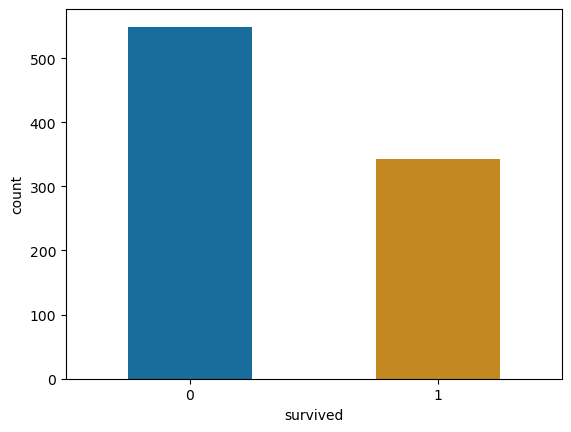

In [381]:
plt.figure("survived")
sns.countplot(x="survived", data=db, palette="colorblind", width=0.5);

Según el conteo de supervivencia de nuestra muestra, podemos apreciar que la mayoría de pasajeros, 549 no sobrevivieron, tan sólo se salvaron 342 pasajeros. 

* Variable __"sex"__

In [382]:
db.sex.value_counts()

sex
male      577
female    314
Name: count, dtype: int64

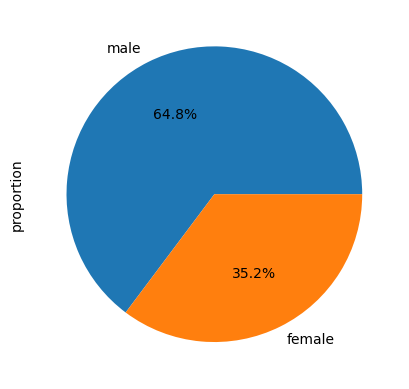

In [383]:
db.sex.value_counts(normalize=True).plot.pie(autopct="%1.1f%%")
plt.show()

Según los datos proporcionados por nuestro dataset, 577 pasajeros fueron hombres (65%) y 314 fueron mujeres(35%).

* Variable __"pclass"__

In [384]:
db.pclass.value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [385]:
db.pclass.value_counts(normalize=True)

pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

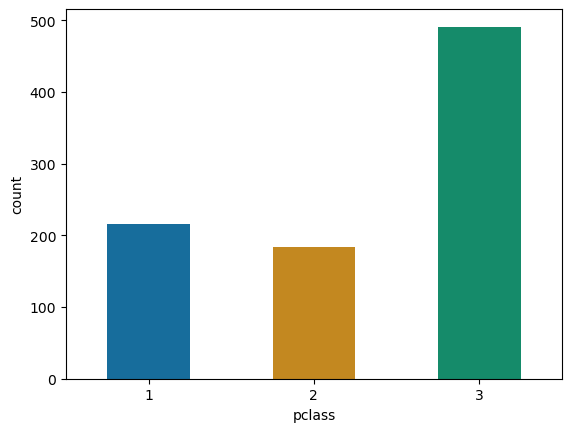

In [386]:
plt.figure("pclass")
sns.countplot(x="pclass", data=db, palette="colorblind", width=0.5);

La gran mayoría de pasajeros 491 viajaban en tercera clase, poco más del 55%, seguida de los pasajeros de primera clase 216, aproximadamente el 24% y 184 pasajeros viajaban en segunda clase aprox 20%.

* Variable __"sibsp"__

In [387]:
db.sibsp.value_counts()

sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

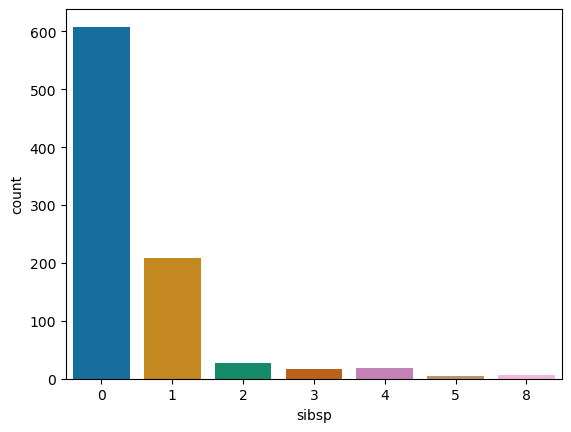

In [388]:
plt.figure("sibsp")
sns.countplot(x="sibsp", data=db, palette="colorblind");

La mayoría de pasajeros 608 aproximadamente el 68% viajaba solo, seguido de 209 pasajeros poco más del 23% que viajaban con algún hermano o cónyuge, en el gráfico también podemos ver otros datos de familias más numerosas.

* Variable __"parch"__

In [389]:
db.parch.value_counts()

parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

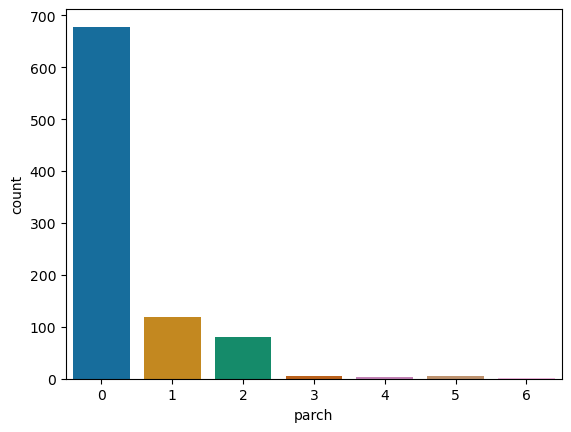

In [390]:
plt.figure("parch")
sns.countplot(x="parch", data=db, palette="colorblind");

Al igual que con la variable sibsp, aquí podemos decir que la mayoría de pasajeros 678 (aproximadamente el 76%) viajaba solo, seguido de 118 pasajeros (poco más del 13%) que viajaban con algún padre o hijos, en el gráfico también podemos ver otros datos de familias más numerosas.

* Variable __"embarked"__

In [391]:
db.embarked.value_counts()

embarked
S    646
C    168
Q     77
Name: count, dtype: int64

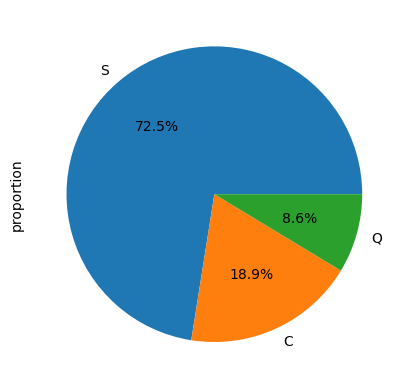

In [392]:
db.embarked.value_counts(normalize=True).plot.pie(autopct="%1.1f%%");

El 72.5% de pasajeros embarcaron en el puerto de Southhampton, el 18.9% en el puerto de Chesbourg y el 8.6% subieron en el puerto de Queenstown.

* Variable __"title"__

In [393]:
db.title.value_counts()

title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [394]:
db.title.value_counts(normalize=True)

title
Mr              0.580247
Miss            0.204265
Mrs             0.140292
Master          0.044893
Dr              0.007856
Rev             0.006734
Mlle            0.002245
Major           0.002245
Col             0.002245
the Countess    0.001122
Capt            0.001122
Ms              0.001122
Sir             0.001122
Lady            0.001122
Mme             0.001122
Don             0.001122
Jonkheer        0.001122
Name: proportion, dtype: float64

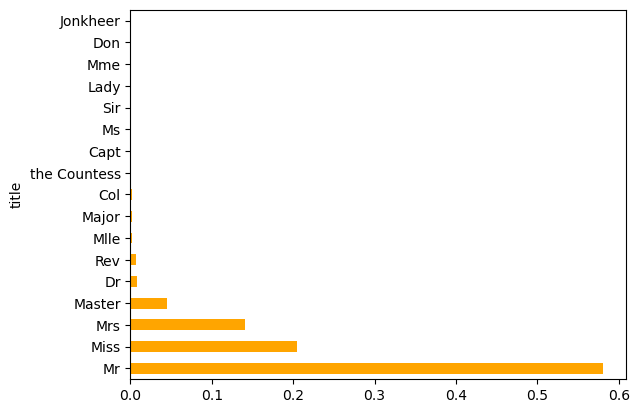

In [395]:
db.title.value_counts(normalize=True).plot.barh(color="orange")
plt.show();

Según este análisis podemos decir que la mayoría de pasajeros 580 tenía el título de "señor", seguido de 182 pasajeras que eran "señoritas" y 125 pasajeras que eran "señoras", si sumamos los títulos designados a hombres y a mujeres, nos coincide con nuestro dato total de pasajeros.

##### Análisis univariado de variables numéricas

* Variable __"age"__

In [396]:
db.age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

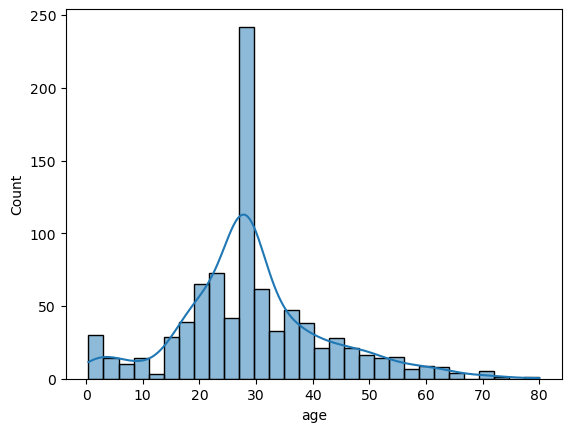

In [397]:
plt.figure("age")
sns.histplot(data=db, x="age", kde=True);

Según el gráfico podemos asegurar que la mayoría de pasajeros eran jóvenes de menos de 30 años.

* Variable __"fare"__

In [398]:
db.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

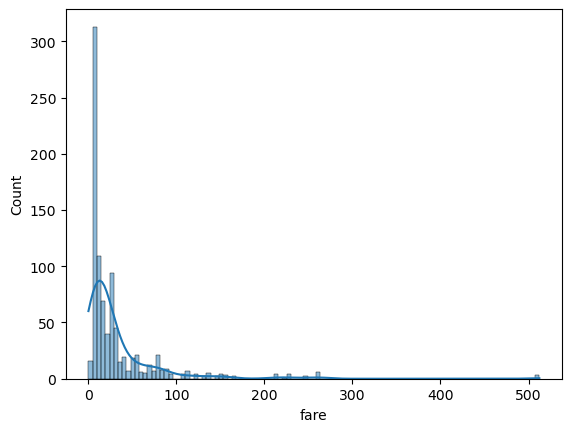

In [399]:
plt.figure("fare")
sns.histplot(data=db, x="fare", kde=True);

La distribución de tarifas nos muestra que hay un mayor número de pasajeros que pagaron los billetes más baratos, es decir que viajaban en tercera clase.

### 7) Analizar las posibles interacciones entre las variables del dataset

##### Análisis bivariado entre variables categóricas

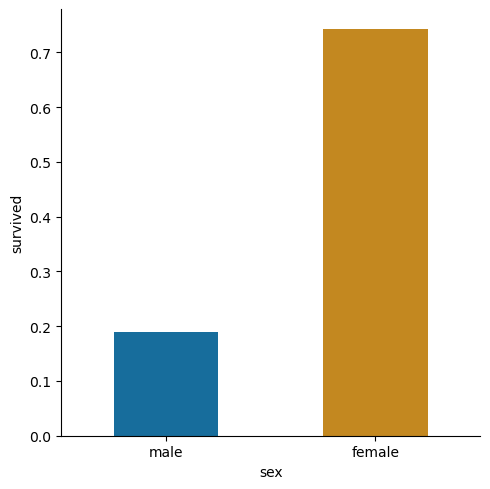

In [400]:
db.groupby("sex")["survived"].mean()
sns.catplot(x = "sex", y = "survived", data = db, kind="bar", ci= None, palette="colorblind", width=0.5)
plt.show()

Al relacionar la variable "sex" con la variable objetivo "survived", vemos que la mayoría de pasajeros que se salvaron de morir fueron mujeres, aproximadamente un 75% frente al aprox 20% de hombres que se salvaron. Lo que nos lleva a afirmar que el sexo es una variable influyente en nuestra variable objetivo.

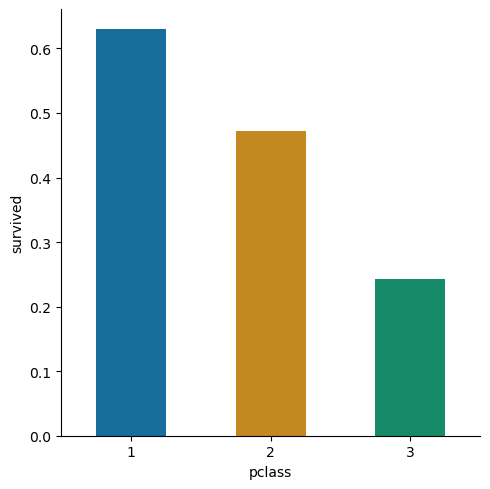

In [401]:
db.groupby("pclass")["survived"].mean()
sns.catplot(x = "pclass", y = "survived", data = db, kind="bar", ci= None, palette="colorblind", width=0.5)
plt.show()

En este gráfico podemos apreciar que los pasajeros de la primera clase fueron los que más probabilidades de sobrevivir tuvieron, opuesto a los pasajeros de tercera clase que fueron los que menos probabilidades de sobrevivir tuvieron. Por lo tanto, sí es determinante esta variable para nuestra variable objetivo.

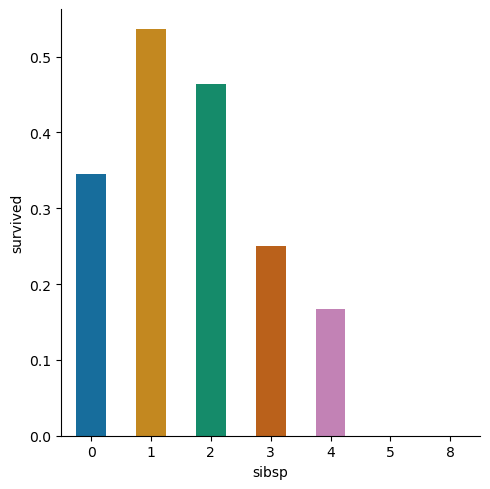

In [402]:
db.groupby("sibsp")["survived"].mean()
sns.catplot(x = "sibsp", y = "survived", data = db, kind="bar", ci= None, palette="colorblind", width=0.5)
plt.show()

Según este gráfico, los pasajeros que viajaban con 1 cónyuge o hermano y 2 hermanos tuvieron más probabilidades de sobrevivir que los que viajaban solos o los que tenían familia más numerosa.

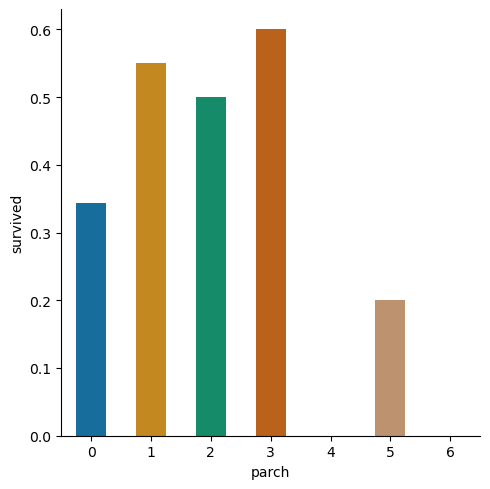

In [403]:
db.groupby("parch")["survived"].mean()
sns.catplot(x = "parch", y = "survived", data = db, kind="bar", ci= None, palette="colorblind", width=0.5)
plt.show()

Al igual que en la variable anterior, aquí los pasajeros que tenían entre 1 y 2 padres o hijos y 3 hijos tuvieron más probabilidades de supervivencia, frente a los que viajaban solos. Esto quizás fue por que se determinó que los niños fuesen los primeros en subir a los botes salvavidas; sin embargo vemos, nuevamente, como familias numerosas no tuvieron las mismas posibilidades de salvarse.

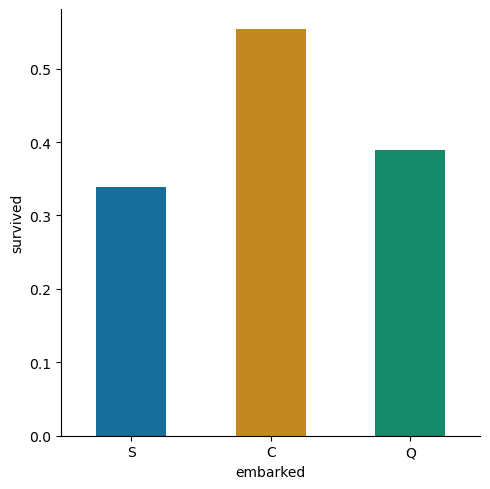

In [404]:
db.groupby("embarked")["survived"].mean()
sns.catplot(x = "embarked", y = "survived", data = db, kind="bar", ci= None, palette="colorblind", width=0.5)
plt.show()

En este análisis podemos apreciar que los pasajeros que embarcaron en el puerto de Chesbourg fueron los que tuvieron mayor probababilidad de supervivencia, en contraposición con los que embarcaron en Southampton que fueron los que más perecieron.

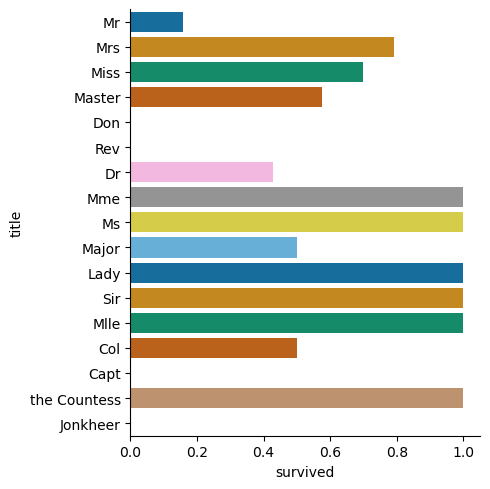

In [405]:
db.groupby("title")["survived"].mean()
sns.catplot(x = "survived", y = "title", data = db, kind="bar", ci= None, palette="colorblind")
plt.show()

El análisis de esta variable "title" es muy especial, pues no sólo nos revela que las mujeres tuvieron más probabilidad de sobrevivir sino que también nos muestra la cruda realidad que los pasajeros que más dinero tenían y/o los que poseían títulos nobiliarios fueron a los que se priorizaron para poder abandonar el barco y poder subir a los botes salvavidas. Es de curiosidad apreciar que los sacerdotes permanecieron en el barco hasta el final, posiblemente acompañando moralmente a los que no iban a poder sobrevivir. Aquí también podemos afirmar la frase: "el capitán se hunde con su barco", puesto que el capitán también zozobró.

##### Análisis bivariado de variables numéricas

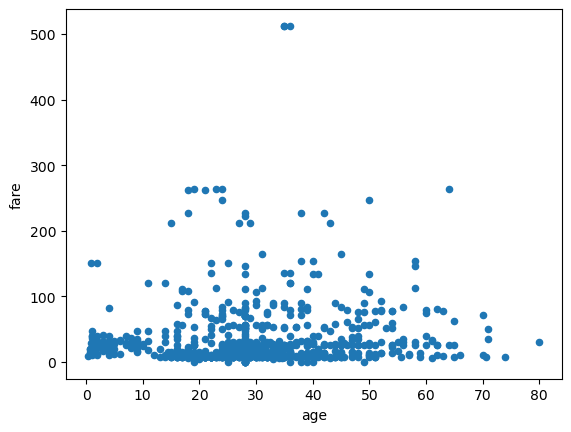

In [406]:
# analizamos "age" y "fare"
db. plot.scatter(x="age", y="fare")
plt.show()

En este gráfico "fare" vs "age" podemos apreciar que la mayoría de pasajeros de mediana edad pagaron los billetes más baratos y sólo algunos pasajeros pagaron los billetes más caros.

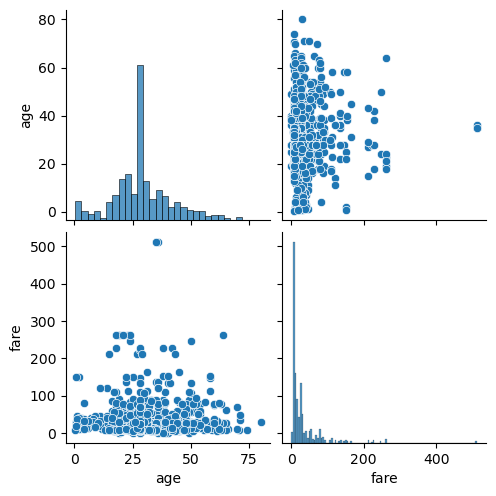

In [407]:
# también podemos graficarlas en Seaborn
sns.pairplot(data=db, vars=["age", "fare"])
plt.show()

Ahora graficamos una matriz de correlación para poder ver la interacción de más variables entre sí y su relevancia, para lo cual sólo vamos a escoger las variables que tengan atributos numéricos, no importa si son categóricas

In [408]:
# recordamos nuestro dataset
db.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,title,full_name
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Mr,Braund Owen Harris
2,1,1,female,38.0,1,0,71.2833,C,Mrs,Cumings John Bradley (Florence Briggs Thayer)
3,1,3,female,26.0,0,0,7.9250,S,Miss,Heikkinen Laina
4,1,1,female,35.0,1,0,53.1000,S,Mrs,Futrelle Jacques Heath (Lily May Peel)
5,0,3,male,35.0,0,0,8.0500,S,Mr,Allen William Henry
6,0,3,male,28.0,0,0,8.4583,Q,Mr,Moran James
7,0,1,male,54.0,0,0,51.8625,S,Mr,McCarthy Timothy J
8,0,3,male,2.0,3,1,21.0750,S,Master,Palsson Gosta Leonard
9,1,3,female,27.0,0,2,11.1333,S,Mrs,Johnson Oscar W (Elisabeth Vilhelmina Berg)


In [409]:
# creamos una matriz de correlación sólo de las variables que tengan números como datos
db_number = db.select_dtypes(include=['number'])
corr_matrix = db_number.corr()

In [410]:
corr_matrix

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


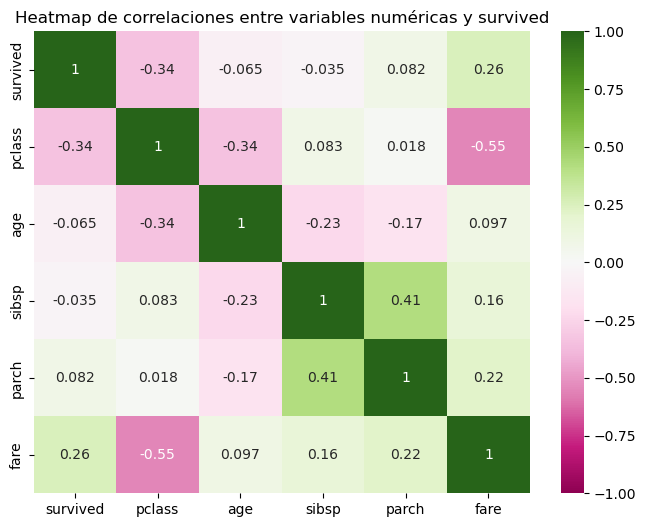

In [411]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap= "PiYG", vmin=-1, vmax=1)
plt.title("Heatmap de correlaciones entre variables numéricas y survived")
plt.show()

según nuestro heatmap podemos apreciar que la variable "survived":
* Está positivamente relacionada con la variable "fare" 0.26: es decir los pasajeros que pagaron tarifas más altas tuvieron tasas de supervivencia más altas.
* Está negativamente relacionada con la variable "pclass" -0,34: es decir los pasajeros de clase baja, (cuyo valor de pclass es mayor) tuvieron tasas de supervivencia más bajas.
* Tiene correlación positiva débil con "parch" 0.082: se podría decir que los pasajeros con algunos padres/hijos a bordo también tienen una probabilidad ligeramente mayor de supervivencia.
* Tiene correlación negativa débil con "sibsp" -0.035: se podría decir que tener más hermanos/cónyuge a bordo tiene una probabilidad ligeramente menor de supervivencia.
* Tiene correlación negativa con "age" -0.065: también se podría decir que a más edad tuviese el pasajero, menor probabilidad de sobrevivir tenía, aunque no es en sí tan proporcional.  


##### Relaciones entre variables numéricas y categóricas

básicamente analizaremos las variables "age"y "fare" relativas a "survived"

In [413]:
db.groupby("survived")["age"].mean()

survived
0    30.028233
1    28.291433
Name: age, dtype: float64

In [414]:
db.groupby("survived")["age"].median()

survived
0    28.0
1    28.0
Name: age, dtype: float64

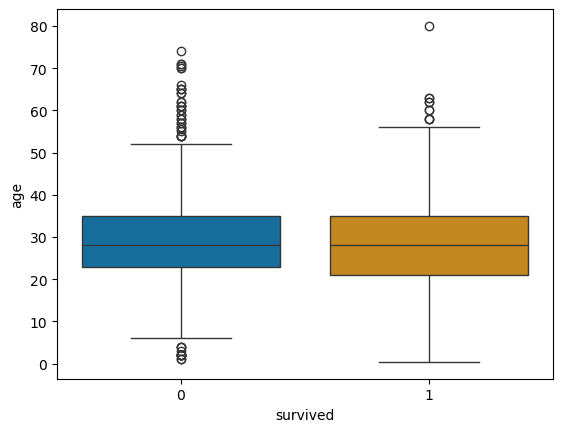

In [415]:
sns.boxplot(x=db.survived, y=db.age, palette="colorblind")
plt.show()

es cuando hacemos este tipo de boxplot que podemos visualizar realmente el conjunto de datos, vemos claramente que muchos pasajeros que sobrevivieron tuvieron edades menores a 20 años y también mayores de 40 años, algo similar puede apreciar en las edades de los pasajeros que murieron, sin embargo aquí también podemos apreciar que muchos niños y más ancianos perecieron.

In [417]:
db.groupby("survived")["fare"].mean()

survived
0    22.117887
1    48.395408
Name: fare, dtype: float64

In [418]:
db.groupby("survived")["fare"].median()

survived
0    10.5
1    26.0
Name: fare, dtype: float64

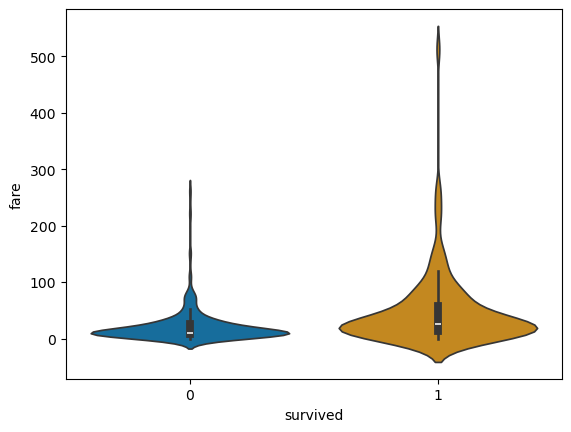

In [419]:
sns.violinplot(x=db.survived, y=db.fare, palette="colorblind")
plt.show()

según nuestros datos y este gráfico de violin podemos afirmar que hubieron pasajeros que pagaron billetes por encima de su valor y estos sí tuvieron altas probabilidades de supervivencia, aunque la mayoría de supervivientes fueron los pasajeros que pagaron un precio medio.

##### Análisis Multivariado

De acuerdo a nuestro análisis apreciamos que las variables "pclass", "sex" y "fare", incluso "age" son las más determinantes para nuestra variable "survived", vamos a hacer algunas interacciones entre ellas.

In [452]:
tabla1 = pd.pivot_table(db,index="pclass",columns="sex",values="survived")
print(tabla1)

sex       female      male
pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


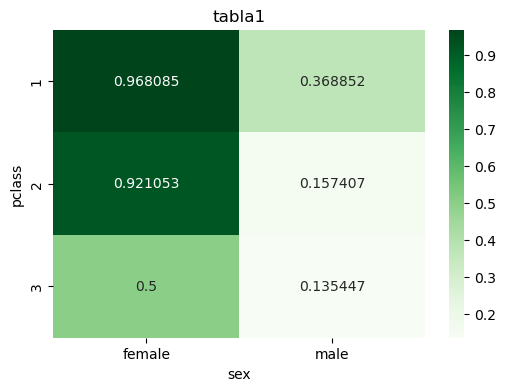

In [517]:
plt.figure(figsize=(6, 4))
sns.heatmap(data=tabla1, annot=True, cmap="Greens", fmt="g")
plt.title("tabla1")
plt.show()

La tabla1 nos muestra que el promedio del porcentaje de mujeres supervivientes en la primera clase 96% fue mayor que en la tercera clase 50% y que notoriamente fue superior al promedio del porcentaje de hombres que se salvaron.

In [432]:
tabla2 = pd.pivot_table(db, index="sex", columns="survived", values="age")
print(tabla2)

survived          0          1
sex                           
female    25.666667  28.716738
male      30.783120  27.382294


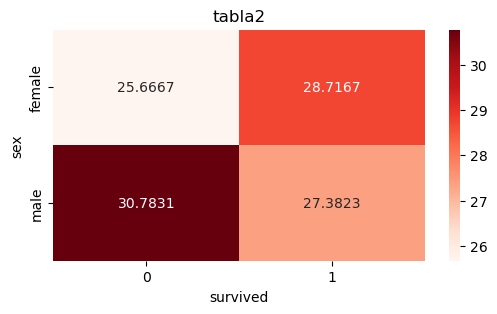

In [516]:
plt.figure(figsize=(6, 3))
sns.heatmap(data=tabla2, annot=True, cmap="Reds", fmt="g")
plt.title("tabla2")
plt.show()

La tabla2 nos muestra que la edad promedio de las mujeres y hombres que sobrevivieron fue de 28 y 27 años respectivamente, cifras no tan alejadas de las de las mujeres y hombres que perecieron (25 y 30 respectivamente).

In [450]:
tabla3 = pd.pivot_table(db, index="sex", columns="pclass", values="fare")
print(tabla3)

pclass           1          2          3
sex                                     
female  106.125798  21.970121  16.118810
male     67.226127  19.741782  12.661633


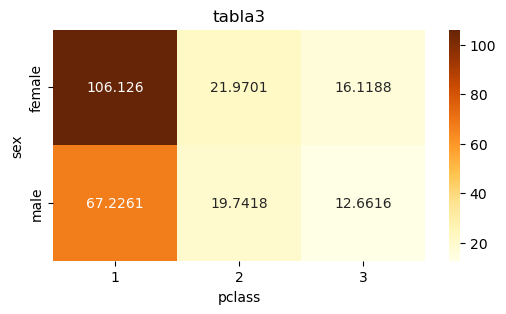

In [515]:
plt.figure(figsize=(6, 3))
sns.heatmap(data=tabla3, annot=True, cmap="YlOrBr", fmt="g")
plt.title("tabla3")
plt.show()

La tabla3 nos muestra, a su vez, que la tarifa promedio pagada por las mujeres en todas las clases fue superior a la de los hombres, siendo la tarifa promedio de las mujeres de primera clase muy superior que la de los hombres de la misma primera clase. Esto nos lleva a confirmar los datos de supervivencia superiores de mujeres ricas y/o con títulos nobiliarios. 

Para obtener una imagen más clara de la relación entre el sexo y la supervivencia, consideramos que se debería usar un modelo estadístico que pueda manejar variables categóricas y sus interacciones con otras variables, como la regresión logística.

### 8) Modelado simple para estudio de viabilidad de proyecto¶

Aquí vamos a entrenar el modelo usando un porcentaje de los datos que disponemos y lo validaremos utilizando otro porcentaje complementario de datos, aplicando un modelo de regresión logística para predecir el resultado de nuestra variable "survived", a partir de algunas de las variables independientes.

In [518]:
# importamos nuestros modelos de machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [519]:
# recordamos nuestro dataset con el se va a trabajar
db.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,title,full_name
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Mr,Braund Owen Harris
2,1,1,female,38.0,1,0,71.2833,C,Mrs,Cumings John Bradley (Florence Briggs Thayer)
3,1,3,female,26.0,0,0,7.9250,S,Miss,Heikkinen Laina
4,1,1,female,35.0,1,0,53.1000,S,Mrs,Futrelle Jacques Heath (Lily May Peel)
5,0,3,male,35.0,0,0,8.0500,S,Mr,Allen William Henry
6,0,3,male,28.0,0,0,8.4583,Q,Mr,Moran James
7,0,1,male,54.0,0,0,51.8625,S,Mr,McCarthy Timothy J
8,0,3,male,2.0,3,1,21.0750,S,Master,Palsson Gosta Leonard
9,1,3,female,27.0,0,2,11.1333,S,Mrs,Johnson Oscar W (Elisabeth Vilhelmina Berg)


* __Escogemos las variables de entrada para nuestro modelo__

In [521]:
X = db[["pclass", "sex", "age", "fare", "sibsp", "parch", "embarked"]].copy(deep=True)

* __Aislamos la variable a predecir__

In [522]:
y = db[["survived"]].copy(deep=True)

* __Convertimos las etiquetas a números__

Para poder usar las varibles categóricas como entrada, debemos convertirlas a números, vamos a despreciar la variable "title" y la variable "full_name" ya que al no seguir ningún orden podría darnos datos que no se ajustarían a nuestros análisis.

In [527]:
# seleccionamos las variables categóricas a convertir
vcat_list= ["sex", "embarked"]

In [528]:
# creamos un diccionario y un bucle para convertir las variables
label_enc_dict = {}
for cat_var in vcat_list:
    label_enc = LabelEncoder()
    X[cat_var] = label_enc.fit_transform(X[cat_var])
    label_enc_dict[cat_var] = label_enc

In [529]:
X

,pclass,sex,age,fare,sibsp,parch,embarked
PassengerId,,,,,,,
1,3,1,22.0,7.2500,1,0,2
2,1,0,38.0,71.2833,1,0,0
3,3,0,26.0,7.9250,0,0,2
4,1,0,35.0,53.1000,1,0,2
5,3,1,35.0,8.0500,0,0,2
...,...,...,...,...,...,...,...
887,2,1,27.0,13.0000,0,0,2
888,1,0,19.0,30.0000,0,0,2
889,3,0,28.0,23.4500,1,2,2


* __Estandarización de valores numéricos__

En este caso vamos a utilizar el modelo Standard Scaler para ajustar los datos de las variables de manera que la distribución se centre alrededor de 0 con una desviación estándar de 1, aunque en "fare" tengamos algunos outliers.

In [530]:
# importamos el modelo
from sklearn.preprocessing import StandardScaler

In [531]:
# escogemos las variables numéricas que queremos normalizar
vnum_list = ["age","fare","pclass","sibsp", "parch"]

In [532]:
# creamos un diccionario para guardar el objeto creado
scaler_dict = {}
for num_var in vnum_list:
    standsc = StandardScaler()
    X[num_var] = standsc.fit_transform(X[num_var].to_numpy().reshape(-1,1))
    scaler_dict[num_var] = standsc

In [533]:
X

,pclass,sex,age,fare,sibsp,parch,embarked
PassengerId,,,,,,,
1,0.827377,1,-0.565736,-0.502445,0.432793,-0.473674,2
2,-1.566107,0,0.663861,0.786845,0.432793,-0.473674,0
3,0.827377,0,-0.258337,-0.488854,-0.474545,-0.473674,2
4,-1.566107,0,0.433312,0.420730,0.432793,-0.473674,2
5,0.827377,1,0.433312,-0.486337,-0.474545,-0.473674,2
...,...,...,...,...,...,...,...
887,-0.369365,1,-0.181487,-0.386671,-0.474545,-0.473674,2
888,-1.566107,0,-0.796286,-0.044381,-0.474545,-0.473674,2
889,0.827377,0,-0.104637,-0.176263,0.432793,2.008933,2


En este paso, una vez que ya tenemos nuestras variables bien tratadas podemos sacar más correlaciones interesantes que antes eran imposibles de calcular.

In [534]:
X_matriz_corr = X.copy()
X_matriz_corr["survived"] = y

In [535]:
corr_matrix = X_matriz_corr.corr()

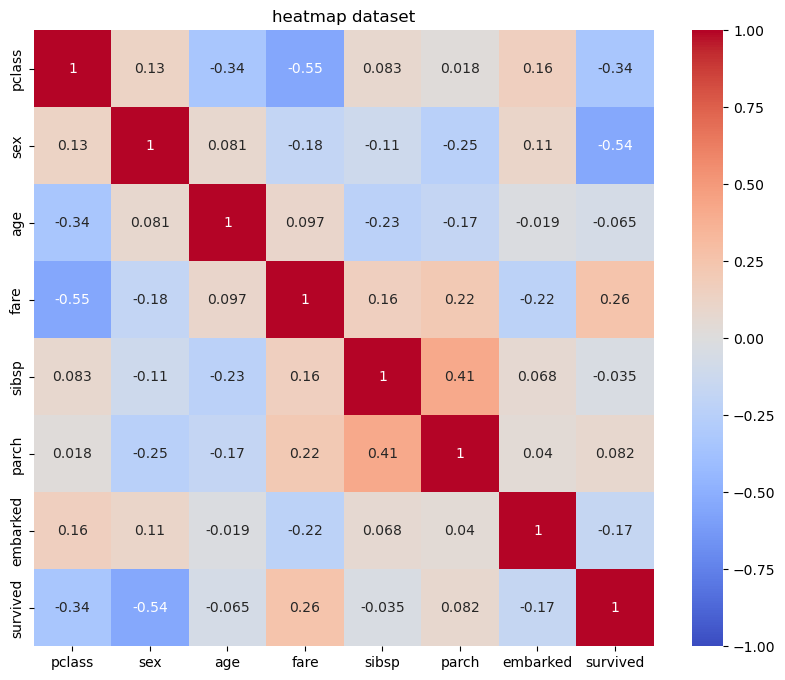

In [539]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)
plt.title("heatmap dataset")
plt.show()

En nuestro heatmap podemos observar que la varible "fare" tiene una influencia importante en nuestra variable objetivo "survived", por lo que podemos afirmar que es una variable valiosa de cara al modelo, asimismo la variable "parch" también es importante para nuestra variable objetivo. También se puede apreciar que aunque la mayoría de supervivientes fueron mujeres, según nuestro análisis "sex" representa una correlación débil con nuestra variable objetivo, sin embargo la variable "age" sí está relacionada aunque de una manera débil, esto tendría que ver con que se priorizó a los niños para que fuesen salvados del naufragio. Interés especial representa la variable "pclass" que aunque sabemos que la gran mayoría de pasajeros de la primera clase fueron los que se salvaron, según nuestro análisis muestra una correlación débil con nuestra variable "survived" y esto es por que la gran mayoría de pasajeros viajaba en la tercera clase donde hubo pocos supervivientes.


* __Aplicación de algoritmo de clasificación__

In [543]:
# dividimos los datos en conjuntos de entrenamiento/validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [545]:
# entrenamos el modelo escogido con los datos
log_Regr = LogisticRegression()

In [550]:
log_Regr.fit(X_train, np.ravel(y_train))

LogisticRegression()

In [551]:
LogisticRegression()

LogisticRegression()

In [556]:
# realizamos algunas predicciones
predicciones = log_Regr.predict(X_test)

In [557]:
print(predicciones[:10])

[0 0 0 0 0 0 0 0 1 1]


* __Cálculo de métrica: ACCURACY__

usaremos accuracy para validar qué tal funciona el modelo en el conjunto de entrenamiento, recordemos que accuracy es una medida que indica la proporción de predicciones correctas sobre el total de predicciones realizadas. 

In [558]:
# esta función compara elemento a elemento e indica si cada predicción es correcta o incorrecta
def accuracy(ground_truth, predicciones):
    comparar_valores = list(ground_truth == predicciones)
    n_true = comparar_valores.count(True)
    n_false = comparar_valores.count(False)
    return n_true/(n_true + n_false)

In [559]:
# predecimos las etiquetas en el conjunto de entrenamiento.
predicciones_train = log_Regr.predict(X_train)
ground_truth_train = y_train.to_numpy().reshape(-1)

In [560]:
# comparamos las etiquetas verdaderas con las predicciones del modelo para calcular la precisión.
accuracy(ground_truth_train, predicciones_train)

0.7991573033707865

según nuestros datos del conjunto de entrenamiento, tenemos una precisión del 79%

In [562]:
# ahora calculamos la misma métrica en el set de validación
predicciones_test = log_Regr.predict(X_test)
ground_truth_test = y_test.to_numpy().reshape(-1)

In [563]:
# comparamos las etiquetas verdaderas con las predicciones del modelo para calcular la precisión.
accuracy(ground_truth_test, predicciones_test)

0.7877094972067039

según nuestros datos del conjunto de validación, nuestro modelo muestra una precisión del __78%__

Obtener una precisión del 79% en el conjunto de entrenamiento y 78% en el conjunto de validación indica que el modelo está haciendo un buen trabajo en predecir si alguien sobrevivió o no (variable "survived"), y que sus predicciones son consistentes en datos que ha visto durante el entrenamiento y en datos nuevos.

* __Cálculo de métrica: CONFUSION MATRIX__

Revisaremos también la matriz de confusión para comparar unas clases con otras, lo que podría ayudar a ver si hay algún sesgo hacia una clase específica.

____¿ Qué es una matriz de confusión y cómo se interpreta?___ 
una matriz de confusión muestra el número de instancias que se clasificaron correctamente e incorrectamente en cada clase. Para la variable "survived" donde las clases pueden ser 0 y 1, la matriz de confusión muestra 4 valores diferentes, 2 para la predicción TN y FP y 2 valores para los actuales o reales: FN y TP.
Donde:
* TN (True Negative): es el número de instancias de la clase 0 que fueron clasificadas correctamente como 0.
* FP (False Positive): es el número de instancias de la clase 0 que fueron incorrectamente clasificadas como 1.
* FN (False Negative): es el número de instancias de la clase 1 que fueron incorrectamente clasificadas como 0.
* TP (True Positive): es el número de instancias de la clase 1 que fueron clasificadas correctamente como 1.

In [566]:
# ahora sí importamos nuestra librería
from sklearn import metrics

In [577]:
# establecemos nuestra matriz de confusiones con nuestros datos de etiquetas verdaderas y con las predichas
conf_matrix = metrics.confusion_matrix(y_test, predicciones)

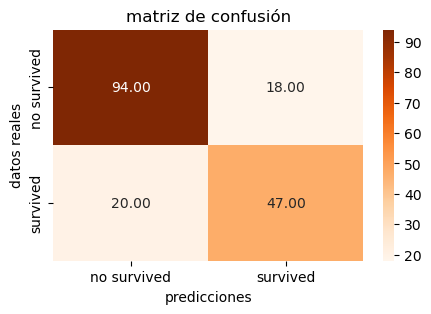

In [579]:
# graficamos la matriz
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Oranges",
            xticklabels=["no survived", "survived"],
            yticklabels=["no survived", "survived"])
plt.xlabel("predicciones")
plt.ylabel("datos reales")
plt.title("matriz de confusión")
plt.show()

según nuestra matriz de confusión:
* TN = 94, son los casos negativos correctamente identificados.
* FP = 18, son los casos negativos incorrectamente identificados como positivos.
* FN = 20, son los casos positivos incorrectamente identificados como negativos.
* TP = 47, son los casos positivos correctamente identificados.

Para comprender cómo está funcionando el modelo en la clasificación de la variable "survived" e interpretar y analizar mejor el rendimiento del modelo en términos de precisión y recuperación, sería interesante también hacer una interpretación del Puntaje F1 (F1 score)

* __Aplicación del F1 SCORE__

El puntaje F1 es la media armónica entre precisión y recuperación, proporcionando un equilibrio entre ambos. 

In [582]:
# extraemos los resultados de nuestra matriz de confusión
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

In [585]:
# aplicamos las fórmulas establecidas para obtener la precisión y recuperación
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recuperacion = TP / (TP + FN) if (TP + FN) > 0 else 0

In [586]:
# calculamos el puntaje F1
puntaje_f1 = 2 * (precision * recuperacion) / (precision + recuperacion) if (precision + recuperacion) > 0 else 0

print(f"Precisión: {precision:.2f}")
print(f"Recuperación: {recuperacion:.2f}")
print(f'F1 SCORE: {puntaje_f1:.2f}')

Precisión: 0.72
Recuperación: 0.70
F1 SCORE: 0.71


Con estos resultados obtenidos podemos afirmar que:
* ___Precisión: 0.72___, significa que 72% de las veces que el modelo predijo un pasajero sobreviviría, realmente fue así. Quiere decir que el modelo tiene una buena tasa de aciertos cuando predice la clase positiva, pero aún hay un 28% de falsos positivos.
* ___Recuperación: 0.72___, significa que el modelo identificó correctamente el 70% de datos de supervivientes. Esto indica que el modelo podría estar perdiendo el 30% de los casos positivos reales, es decir, los falsos negativos.
* ___F1 score: 0.71___, significa que existe un equilibrio razonable entre precisión y recuperación, está relativamente cerca del máximo valor de 1.0, lo que indica que el modelo tiene un rendimiento razonable.

#### 9) Conclusiones

A pesar que es un dataset con datos bastante sencillos, se podría sugerir también:
* Aplicar ingeniería de características para crear nuevas características a partir de las ya existentes y que ayuden a capturar patrones que el modelo actual no está detectando y que puedan mejorar la capacidad predictiva del modelo.
* Utilizar técnicas de selección de características para identificar y mantener sólo las características más relevantes, eliminando las que no aportan valor.
